importing all the necessary packages

In [72]:
import pandas as pd
from sklearn import metrics
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

I separated the original dataset into its each binary classification used for this project, and then saved them as their own file. 

In [73]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/hk.csv'), 'data file is missing.'
hkdata = pd.read_csv(f'{data_dir}/hk.csv')
mydata = pd.read_csv(f'{data_dir}/my.csv')
mwdata = pd.read_csv(f'{data_dir}/mw.csv')

In [74]:
hkdata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,K,7,9,8,5,4,5,8,4,6,10,11,11,6,12,4,7
1469,K,5,9,5,4,2,7,7,3,6,9,8,9,6,11,3,7
1470,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
1471,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9


In [75]:
mydata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
1,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
2,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
3,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
4,M,4,5,7,4,4,6,6,3,4,9,9,10,7,5,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,Y,1,1,3,2,1,6,10,1,6,8,11,8,1,11,2,8
1574,Y,5,7,5,5,2,3,10,2,7,11,11,6,1,11,2,5
1575,Y,4,10,6,7,1,9,11,3,2,5,13,8,1,11,0,8
1576,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4


In [76]:
mwdata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,W,12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6
1,W,5,9,6,7,8,7,9,5,3,7,9,8,6,8,3,8
2,W,3,4,4,3,2,9,10,3,2,5,9,7,6,11,0,8
3,W,4,8,5,6,3,6,8,4,1,7,8,8,8,9,0,8
4,W,2,1,3,1,1,7,8,4,0,7,8,8,6,10,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,M,5,10,6,8,4,7,7,12,2,7,9,8,9,6,0,8
1540,M,4,3,4,5,3,7,7,12,1,7,9,8,8,6,0,8
1541,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
1542,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6


The following cells shows summary statistics of the H-K, M-Y, and M-W data, along with histograms of their distributions.

(1473, 17)
             x-box        y-box        width         high        onpix  \
count  1473.000000  1473.000000  1473.000000  1473.000000  1473.000000   
mean      4.420910     7.083503     5.865580     5.283775     4.116768   
std       1.900914     3.320793     2.207538     2.192406     2.186905   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     6.000000     6.000000     4.000000   
75%       5.000000     9.000000     7.000000     7.000000     6.000000   
max      12.000000    15.000000    12.000000    10.000000    11.000000   

             x-bar        y-bar        x2bar        y2bar        xybar  \
count  1473.000000  1473.000000  1473.000000  1473.000000  1473.000000   
mean      6.465716     7.194840     5.257977     4.805838     8.131704   
std       1.807389     1.042924     3.751084     2.232795     1.597053   
min       2.000000     4.0

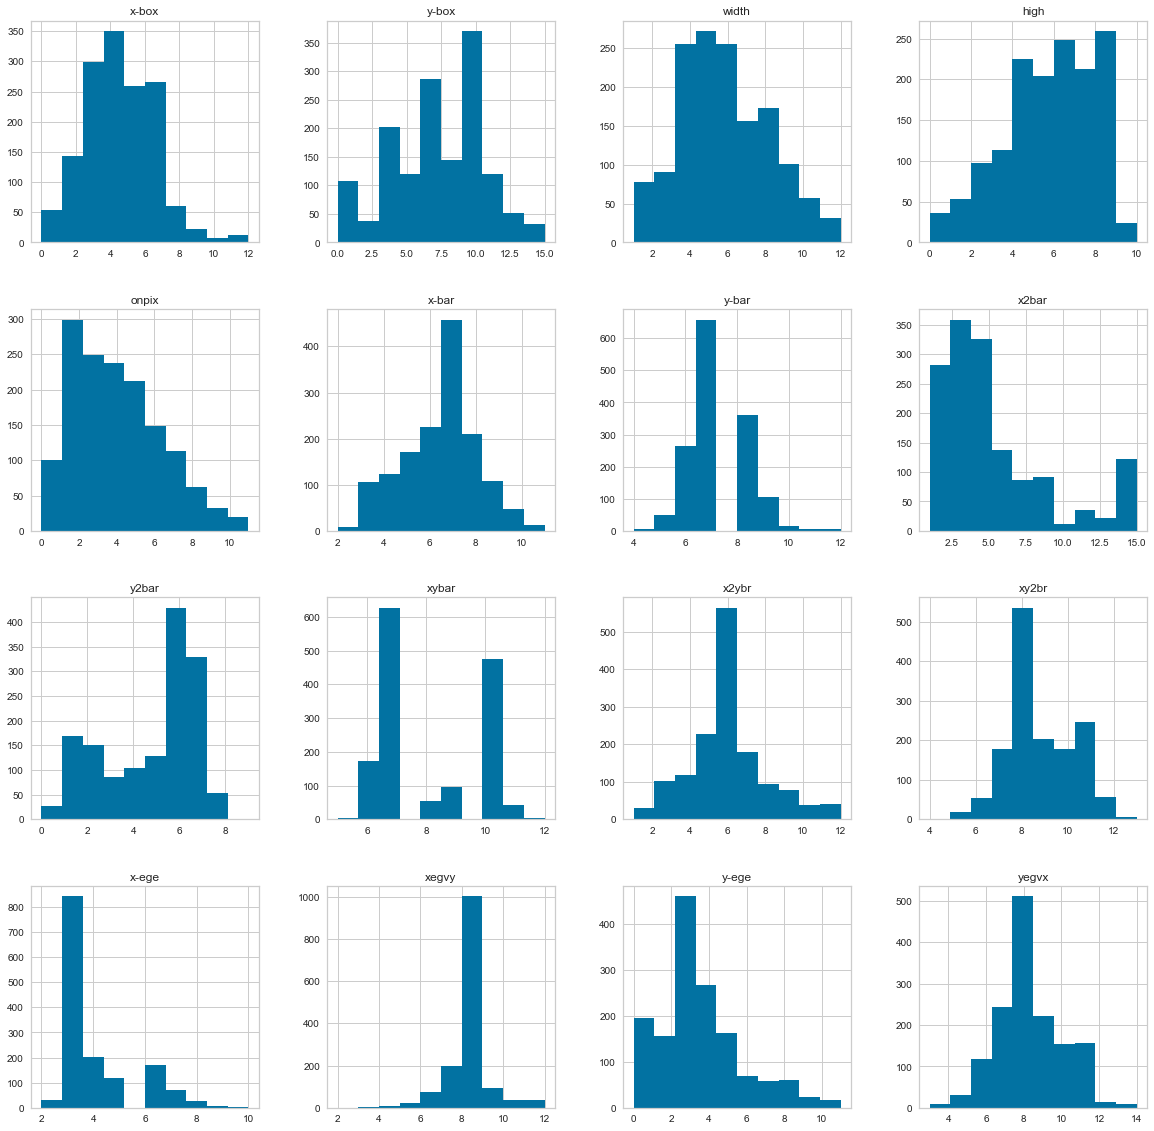

In [77]:
#Return the dimensionality of the DataFrame
print(hkdata.shape)
#Generates descriptive statistics
print(hkdata.describe())
#class distribution
print(hkdata.groupby('class').size())
#histograms
hkdata.hist()
plt.show()

(1578, 17)
             x-box        y-box        width         high        onpix  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean      4.539924     6.830798     5.946768     5.505070     4.166667   
std       2.106244     3.268945     2.240676     2.502308     2.813272   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     6.000000     6.000000     4.000000   
75%       6.000000     9.000000     7.000000     7.000000     6.000000   
max      15.000000    15.000000    15.000000    15.000000    15.000000   

             x-bar        y-bar        x2bar        y2bar        xybar  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean      7.041191     7.946134     4.326996     3.996831     7.687579   
std       1.997831     2.199674     3.179802     2.114506     1.979440   
min       2.000000     1.0

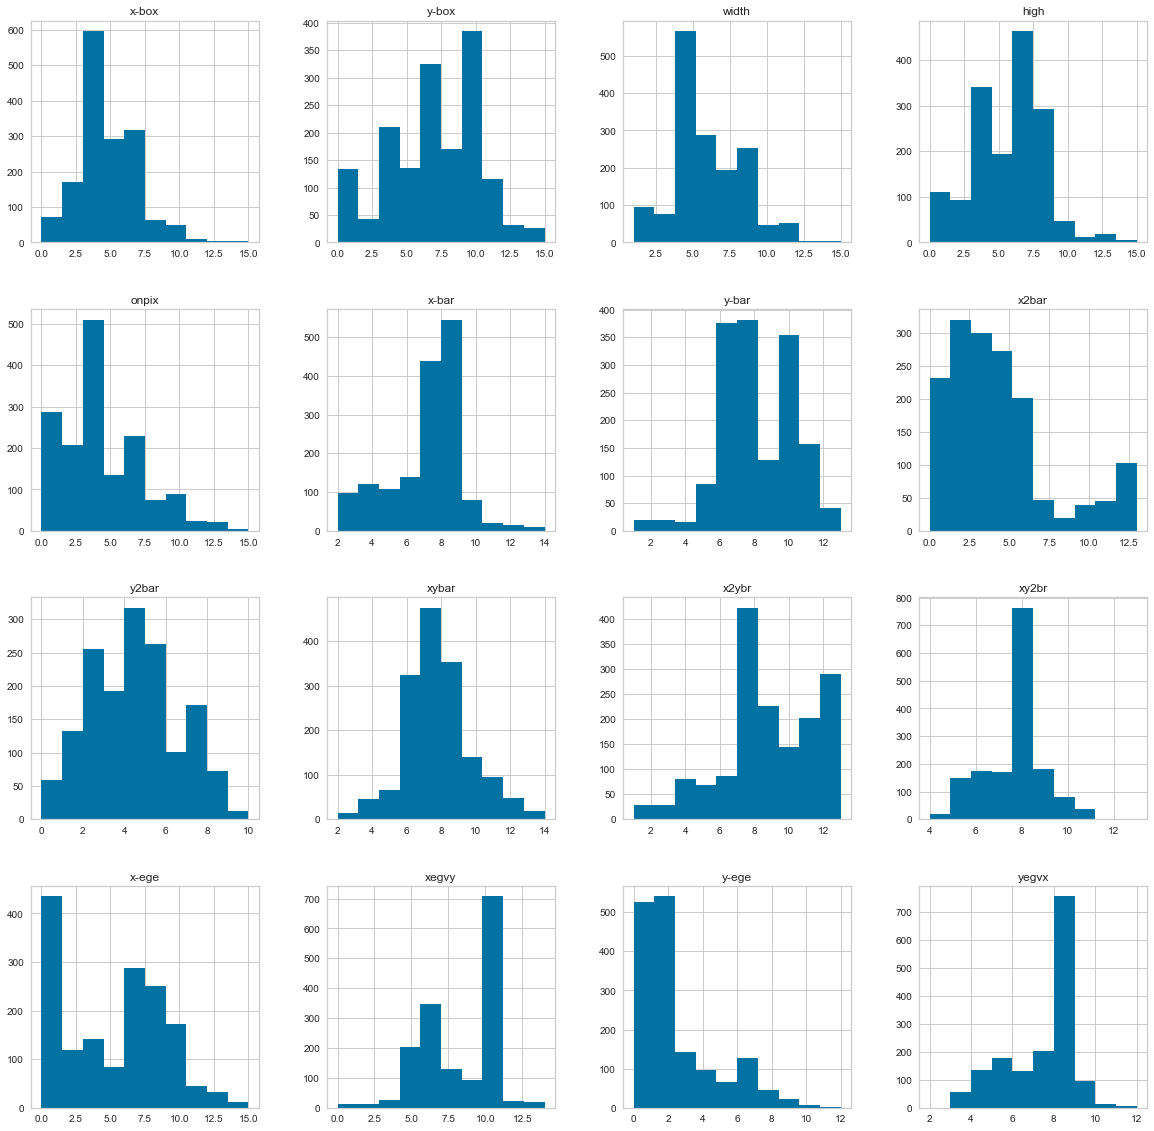

In [78]:
#Return the dimensionality of the DataFrame
print(mydata.shape)
#Generates descriptive statistics
print(mydata.describe())
#class distribution
print(mydata.groupby('class').size())
#histograms
mydata.hist()
plt.show()

(1544, 17)
             x-box        y-box        width         high        onpix  \
count  1544.000000  1544.000000  1544.000000  1544.000000  1544.000000   
mean      5.028497     7.053109     6.564119     5.308290     5.064767   
std       2.138246     3.350515     2.288019     2.180639     2.694600   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       4.000000     5.000000     5.000000     4.000000     3.000000   
50%       5.000000     8.000000     6.000000     6.000000     4.000000   
75%       6.000000    10.000000     8.000000     7.000000     7.000000   
max      15.000000    15.000000    15.000000     9.000000    15.000000   

             x-bar        y-bar        x2bar        y2bar        xybar  \
count  1544.000000  1544.000000  1544.000000  1544.000000  1544.000000   
mean      6.880181     7.774611     4.797927     2.761658     7.525259   
std       2.163270     2.060580     2.910075     1.495790     1.536553   
min       1.000000     1.0

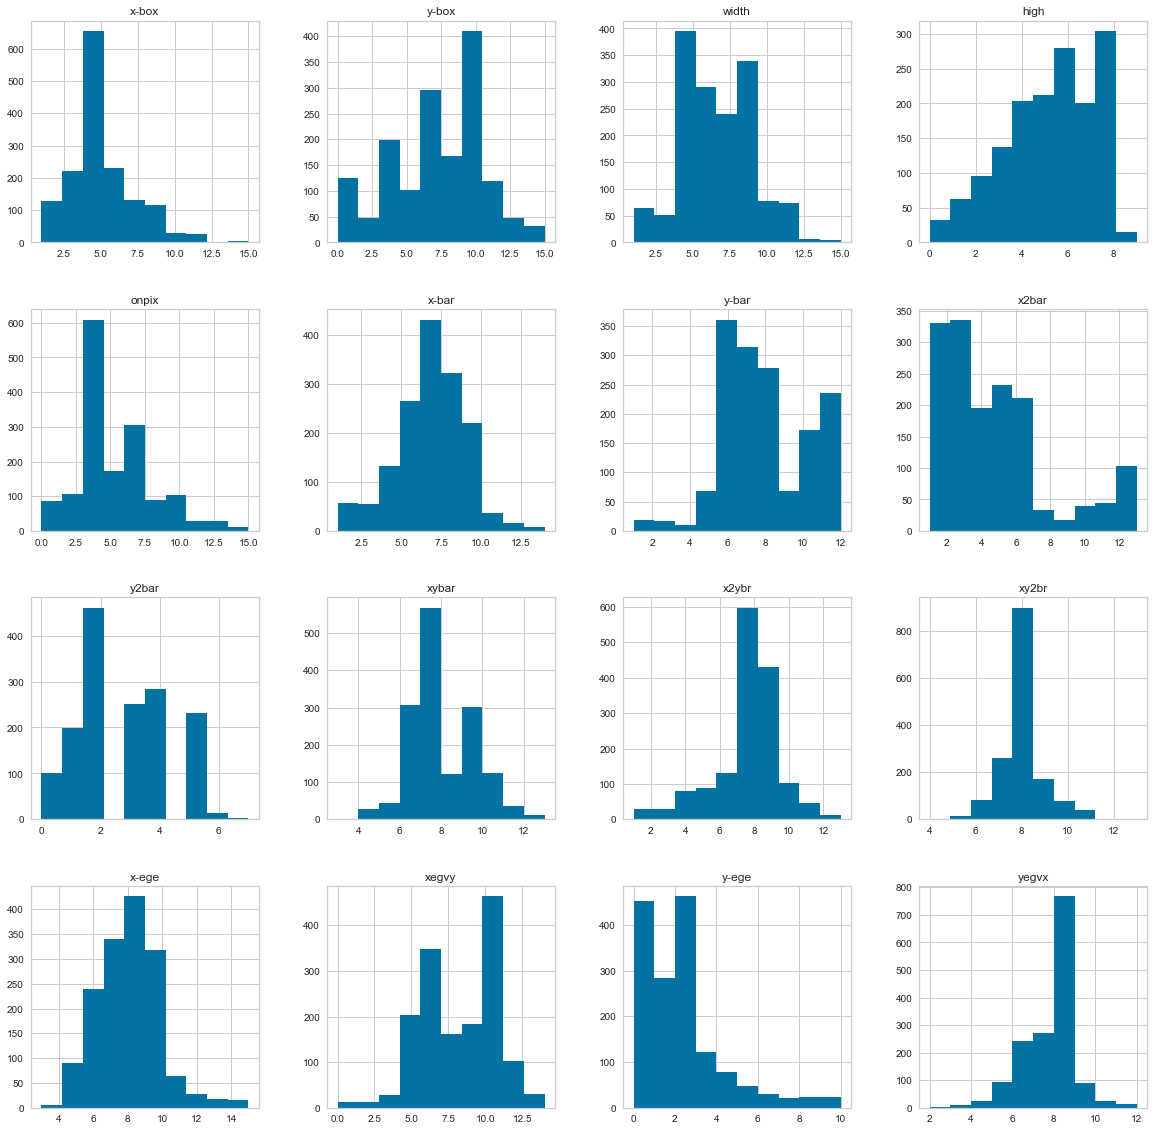

In [79]:
#Return the dimensionality of the DataFrame
print(mwdata.shape)
#Generates descriptive statistics
print(mwdata.describe())
#class distribution
print(mwdata.groupby('class').size())
#histograms
mwdata.hist()
plt.show()

The following cell separates the data into its X and Y subsets

In [80]:
hk_array = hkdata.values
X_hk = hk_array[:, 1:17]
Y_hk = hk_array[:, 0]
print('X_hk matrix dimensionality:', X_hk.shape)
print('Y_hk vector dimensionality:', Y_hk.shape)
my_array = mydata.values
X_my = my_array[:, 1:17]
Y_my = my_array[:, 0]
print('X_my matrix dimensionality:', X_my.shape)
print('Y_my vector dimensionality:', Y_my.shape)
mw_array = mwdata.values
X_mw = mw_array[:, 1:17]
Y_mw = mw_array[:, 0]
print('X_mw matrix dimensionality:', X_mw.shape)
print('Y_mw vector dimensionality:', Y_mw.shape)
Y_hk

X_hk matrix dimensionality: (1473, 16)
Y_hk vector dimensionality: (1473,)
X_my matrix dimensionality: (1578, 16)
Y_my vector dimensionality: (1578,)
X_mw matrix dimensionality: (1544, 16)
Y_mw vector dimensionality: (1544,)


array(['H', 'H', 'H', ..., 'K', 'K', 'K'], dtype=object)

The following cell splits the dataset into its training and testing sets; a 10% testing set

In [81]:
X_hk_train, X_hk_test, Y_hk_train, Y_hk_test = model_selection.train_test_split(X_hk, Y_hk, test_size=0.10, random_state=10)
X_my_train, X_my_test, Y_my_train, Y_my_test = model_selection.train_test_split(X_my, Y_my, test_size=0.10, random_state=10)
X_mw_train, X_mw_test, Y_mw_train, Y_mw_test = model_selection.train_test_split(X_mw, Y_mw, test_size=0.10, random_state=10)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

The following cells use the KNeighborsClassifier and ConfusionMatrix to do an initial test of the true positive, false positive, true negative, and false negative statistics of each dataset. 

In [83]:
knn_hk = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)
knn_my = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)
knn_mw = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

cm_hk = ConfusionMatrix(knn_hk, classes="H,K".split(','))
cm_my = ConfusionMatrix(knn_my, classes="M,Y".split(','))
cm_mw = ConfusionMatrix(knn_mw, classes="M,W".split(','))

0.972972972972973

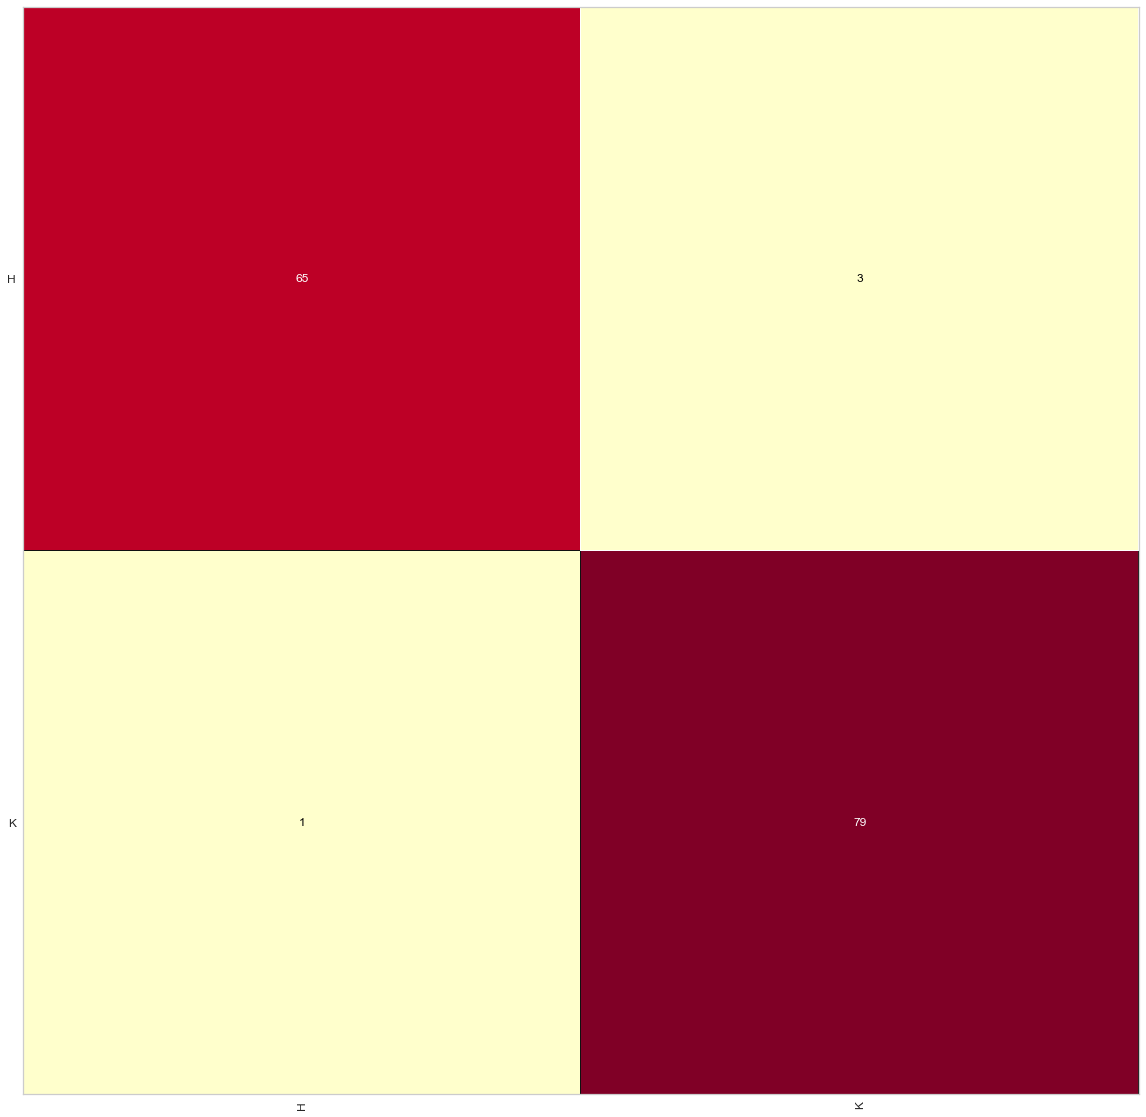

In [84]:
cm_hk.fit(X_hk_train, Y_hk_train)
cm_hk.score(X_hk_test, Y_hk_test)

1.0

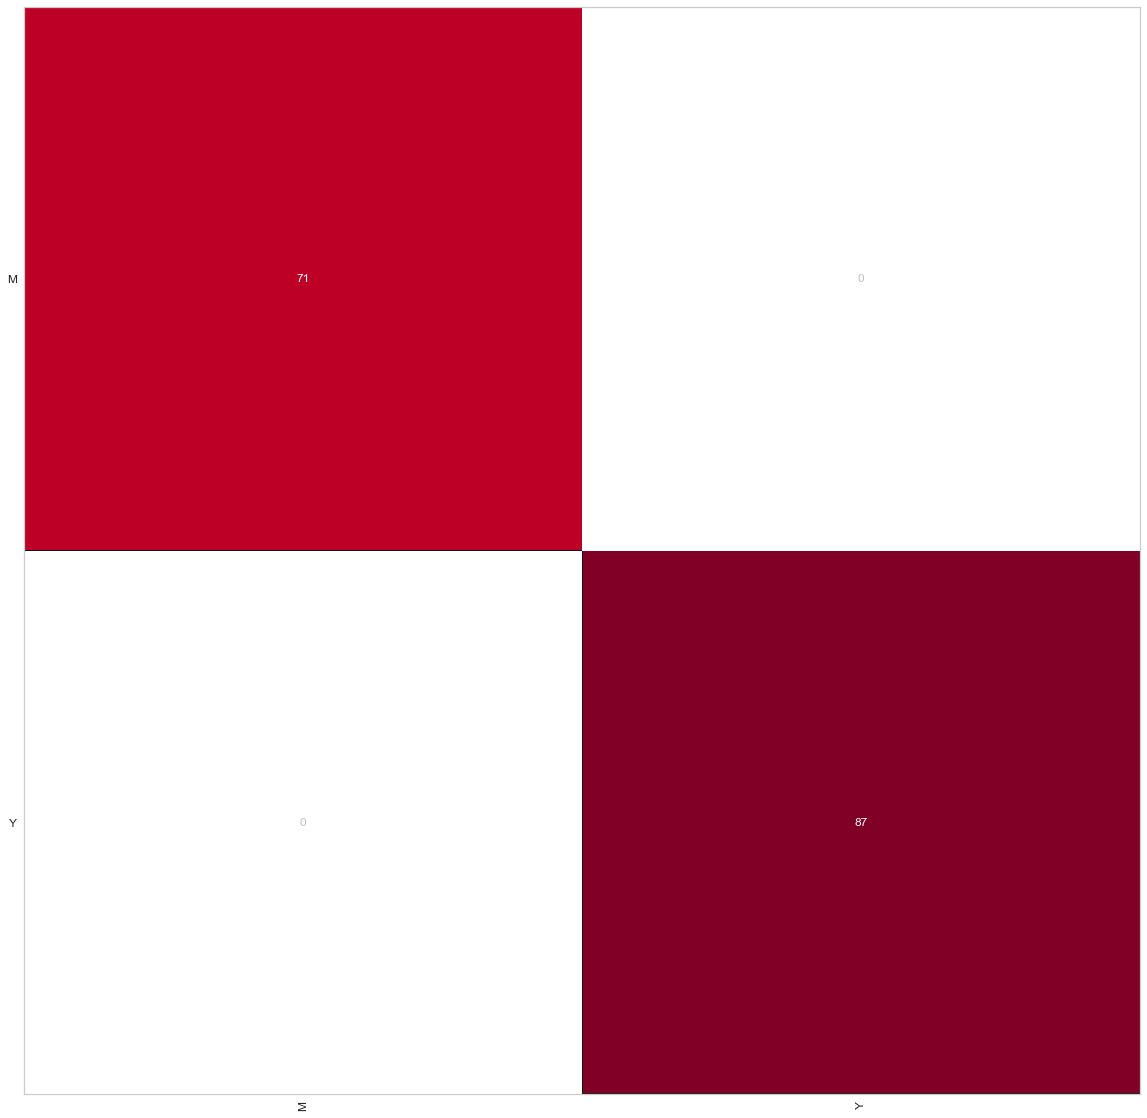

In [85]:
cm_my.fit(X_my_train, Y_my_train)
cm_my.score(X_my_test, Y_my_test)

0.9935483870967742

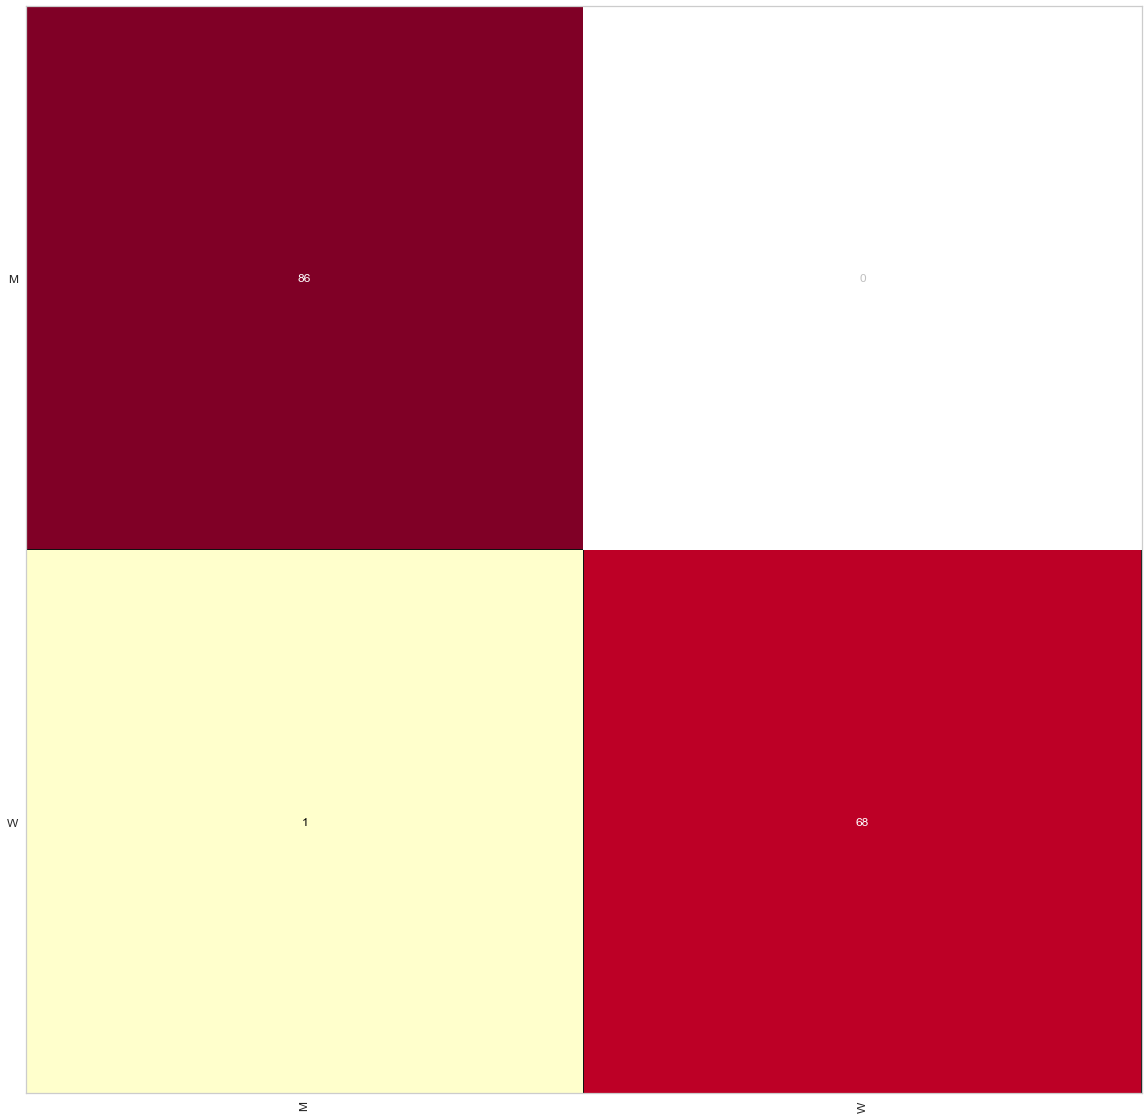

In [86]:
cm_mw.fit(X_mw_train, Y_mw_train)
cm_mw.score(X_mw_test, Y_mw_test)

The following cells predicts and shows the precision, recall, f1-score, and support of each dataset. 

In [87]:
hk_predictions = cm_hk.predict(X_hk_test)
print("Accuracy: ", accuracy_score(Y_hk_test, hk_predictions))
print(confusion_matrix(Y_hk_test, hk_predictions))
print(classification_report(Y_hk_test, hk_predictions, digits=5))
cm_hk.poof()

my_predictions = cm_my.predict(X_my_test)
print("Accuracy: ", accuracy_score(Y_my_test, my_predictions))
print(confusion_matrix(Y_my_test, my_predictions))
print(classification_report(Y_my_test, my_predictions, digits=5))
cm_my.poof()

mw_predictions = cm_mw.predict(X_mw_test)
print("Accuracy: ", accuracy_score(Y_mw_test, mw_predictions))
print(confusion_matrix(Y_mw_test, mw_predictions))
print(classification_report(Y_mw_test, mw_predictions, digits=5))
cm_mw.poof()

Accuracy:  0.972972972972973
[[65  3]
 [ 1 79]]
              precision    recall  f1-score   support

           H    0.98485   0.95588   0.97015        68
           K    0.96341   0.98750   0.97531        80

    accuracy                        0.97297       148
   macro avg    0.97413   0.97169   0.97273       148
weighted avg    0.97326   0.97297   0.97294       148



<Figure size 1440x1440 with 0 Axes>

Accuracy:  1.0
[[71  0]
 [ 0 87]]
              precision    recall  f1-score   support

           M    1.00000   1.00000   1.00000        71
           Y    1.00000   1.00000   1.00000        87

    accuracy                        1.00000       158
   macro avg    1.00000   1.00000   1.00000       158
weighted avg    1.00000   1.00000   1.00000       158



<Figure size 1440x1440 with 0 Axes>

Accuracy:  0.9935483870967742
[[86  0]
 [ 1 68]]
              precision    recall  f1-score   support

           M    0.98851   1.00000   0.99422        86
           W    1.00000   0.98551   0.99270        69

    accuracy                        0.99355       155
   macro avg    0.99425   0.99275   0.99346       155
weighted avg    0.99362   0.99355   0.99354       155



<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [88]:
from sklearn.model_selection import GridSearchCV

The following cell is now to tune our hyperparamters to find the best distance method, number of neighbors, and weight type for each datatset

In [89]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
hk_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
my_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
mw_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fitting the model for grid search
hk_grid.fit(X_hk_train, Y_hk_train)
my_grid.fit(X_my_train, Y_my_train)
mw_grid.fit(X_mw_train, Y_mw_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [90]:
print(hk_grid.best_params_)
print(hk_grid.best_estimator_)

print(my_grid.best_params_)
print(my_grid.best_estimator_)

print(mw_grid.best_params_)
print(mw_grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', weights='distance')
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(weights='distance')


The following cell shows the precision, recall, f1-score, and support after hyperparameter tuning. 

In [91]:
hk_grid_predictions = hk_grid.predict(X_hk_test)
print("H and K: ",classification_report(Y_hk_test, hk_grid_predictions))
my_grid_predictions = my_grid.predict(X_my_test)
print("M and Y: ", classification_report(Y_my_test, my_grid_predictions))
mw_grid_predictions = mw_grid.predict(X_mw_test)
print("M and W: ", classification_report(Y_mw_test, mw_grid_predictions))

H and K:                precision    recall  f1-score   support

           H       0.98      0.96      0.97        68
           K       0.96      0.99      0.98        80

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

M and Y:                precision    recall  f1-score   support

           M       1.00      1.00      1.00        71
           Y       1.00      1.00      1.00        87

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

M and W:                precision    recall  f1-score   support

           M       1.00      0.99      0.99        86
           W       0.99      1.00      0.99        69

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99 

In [100]:
hk_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_hk_train, Y_hk_train)
    yhat= knn.predict(X_hk_test)
    hk_mean_acc[i-1] = metrics.accuracy_score(Y_hk_test, yhat)

hk_mean_acc

array([0.95945946, 0.96621622, 0.95945946, 0.95945946, 0.97297297,
       0.97297297, 0.96621622, 0.9527027 , 0.95945946, 0.9527027 ,
       0.95945946, 0.9527027 , 0.94594595, 0.9527027 , 0.9527027 ,
       0.94594595, 0.94594595, 0.93918919, 0.9527027 , 0.9527027 ])

The following cells show our cross validation graphs with hyperparameter tuning for each dataset. 

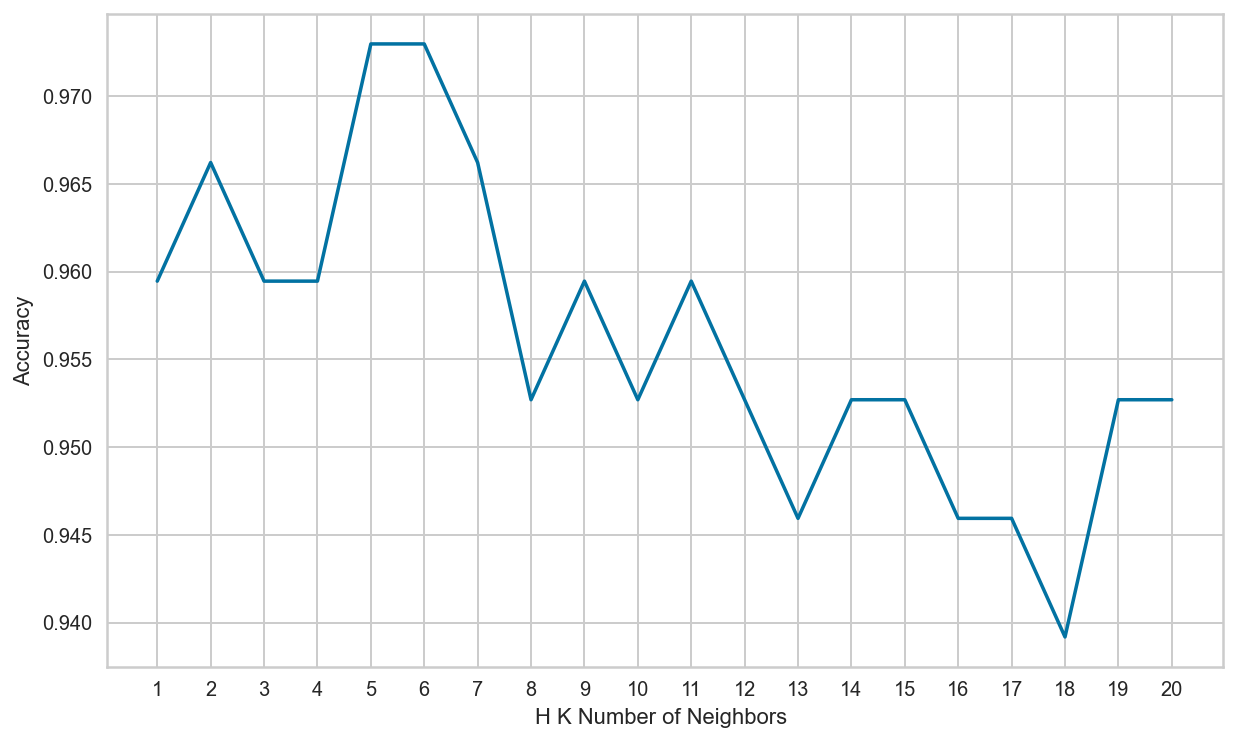

In [113]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('H K Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [102]:
my_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_my_train, Y_my_train)
    my_yhat= knn.predict(X_my_test)
    my_mean_acc[i-1] = metrics.accuracy_score(Y_my_test, my_yhat)

my_mean_acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

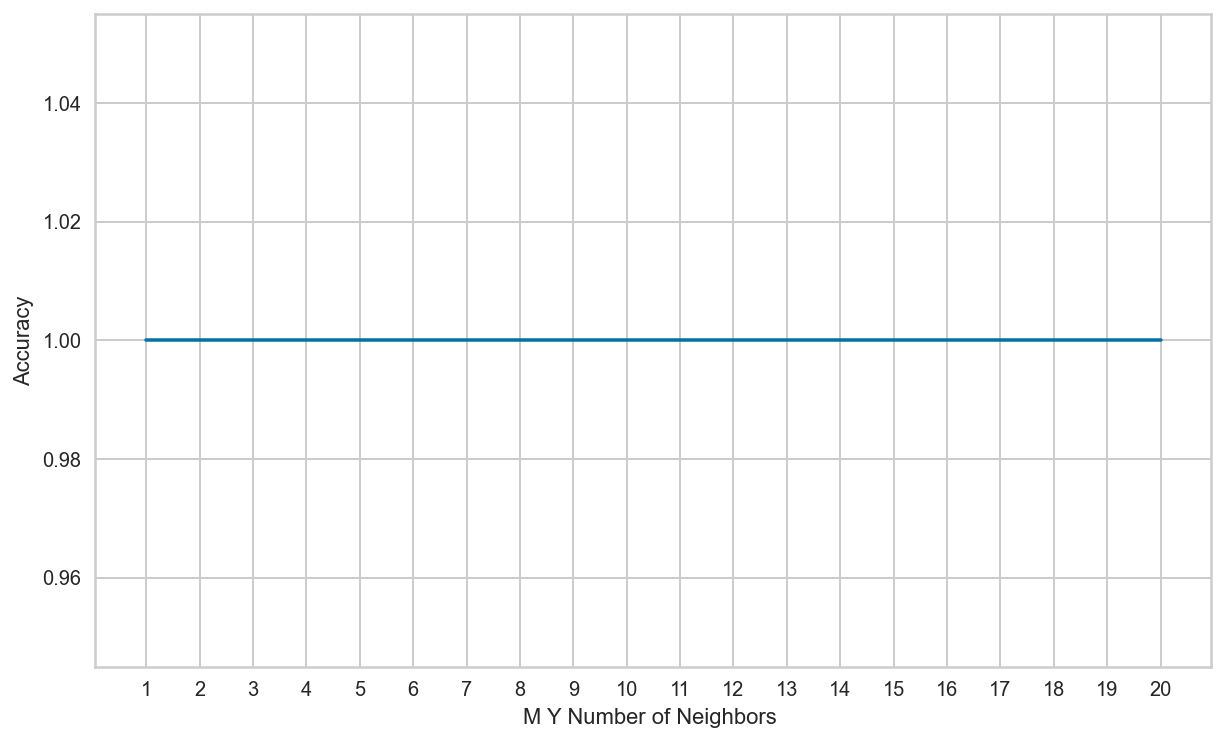

In [114]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), my_mean_acc)
plt.xticks(loc)
plt.xlabel('M Y Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [105]:
mw_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_mw_train, Y_mw_train)
    mw_yhat= knn.predict(X_mw_test)
    mw_mean_acc[i-1] = metrics.accuracy_score(Y_mw_test, mw_yhat)

mw_mean_acc

array([0.99354839, 0.99354839, 0.98709677, 0.99354839, 0.99354839,
       0.98064516, 0.98709677, 0.98709677, 0.99354839, 0.98709677,
       1.        , 0.99354839, 0.99354839, 0.99354839, 0.99354839,
       0.99354839, 0.99354839, 0.98709677, 0.99354839, 0.98064516])

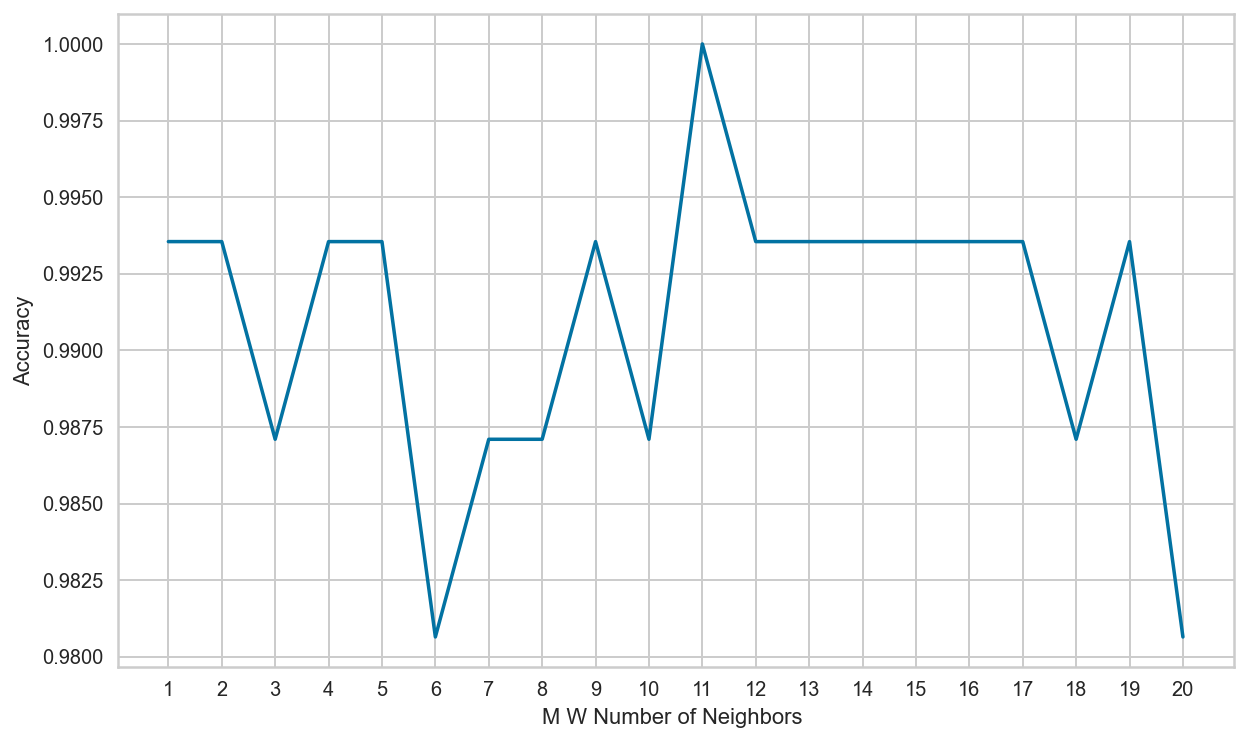

In [115]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mw_mean_acc)
plt.xticks(loc)
plt.xlabel('M W Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()